**Load dataset**

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.metrics as sm

from sklearn.decomposition import PCA,FastICA,TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis,entropy


wine = np.loadtxt("./winequality-white2.csv", delimiter=",") #required deleting the headers for this to work

print (wine.shape)

# store feature matrix in "X"
X = wine[:,0:10]

# store response vector in "y"
y = wine[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(4898, 12)
(3918, 10) (3918,)
(980, 10) (980,)


# PCA

0    9.101644e-01
1    7.938720e-02
2    1.009541e-02
3    3.277469e-04
4    8.746497e-06
5    6.742692e-06
6    5.396482e-06
7    4.175831e-06
8    2.109709e-07
9    6.983392e-10
dtype: float64
0.9996469799048172
8  out of  10


Text(0, 0.5, 'Variance')

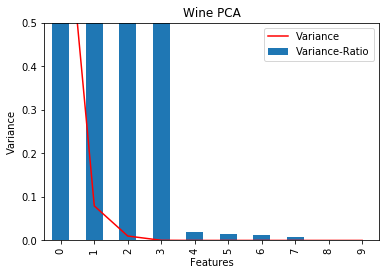

In [7]:
pca = PCA()
pca.fit_transform(X)
pca_res = pd.Series(pca.explained_variance_ratio_)
pca_var = pd.Series(pca.explained_variance_)
loss = 0.001

print (pca_res)
variance = 0
reduced = 0
for x in pca_res:
        if x >= loss:
            variance += x
            reduced +=1
print (variance)
print ( 1 +X.shape[1] - reduced, " out of ", X.shape[1])

pca_res.plot(c = 'r',label = 'Variance')
ax = pca_var.plot(kind = 'bar',ylim = (0.,0.5),label = "Variance-Ratio")
plt.legend()

plt.title("Wine PCA")
plt.xlabel("Features")
plt.ylabel("Variance")

In [4]:
pca = PCA(3)
temp = pca.fit_transform(X)
diff = X - pca.inverse_transform(temp)
print(3)
print("MEAN", np.mean(diff))
print("STD", np.std(diff))
print("MAX", np.max(diff))
print("MIN", np.min(diff))

3
MEAN 3.3040672416643614e-15
STD 0.2736594078576007
MAX 7.33069081484925
MIN -3.1658607830548577


# ICA

0.9996469799048172
8  out of  10


Text(0, 0.5, 'Kurtosis')

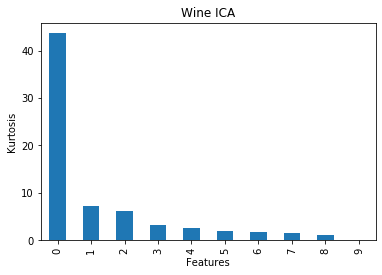

In [6]:
ica = FastICA(tol = 0.005)
temp = ica.fit_transform(X)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
ica_res =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);


variance = 0
reduced = 0
for x in pca_res:
        if x >= loss:
            variance += x
            reduced +=1
print (variance)
print (1 +X.shape[1] - reduced, " out of ", X.shape[1])

ax = ica_res.plot(kind = 'bar');
plt.title("Wine ICA")
plt.xlabel("Features")
plt.ylabel("Kurtosis")

In [7]:
for i in range(1,11):
    ica = FastICA(i,tol = 0.005)
    temp = ica.fit_transform(X)
    diff = X - ica.inverse_transform(temp)
    print(i)
    print("MEAN", np.mean(diff))
    print("STD", np.std(diff))
    print("MAX", np.max(diff))
    print("MIN", np.min(diff))

1
MEAN 2.1864638859485975e-15
STD 4.365509928379244
MAX 160.18221270646268
MIN -57.53122983624303
2
MEAN 2.2502937764619587e-15
STD 1.4887993370704629
MAX 59.09451886147258
MIN -22.86979212729493
3
MEAN 3.30638832859212e-15
STD 0.2736594078576006
MAX 7.330690814849235
MIN -3.1658607830548346
4
MEAN 1.3870670412352385e-15
STD 0.07322182286223271
MAX 1.3072549093730095
MIN -0.376137999639115
5
MEAN 9.51573106414532e-16
STD 0.059211137101242914
MAX 1.309104397052103
MIN -0.34851509572774214
6
MEAN 7.258474026900084e-16
STD 0.045558403383544645
MAX 0.6611478759522036
MIN -0.37686790634832534
7
MEAN 8.732364226026792e-16
STD 0.03050838681901428
MAX 0.6381215474121726
MIN -0.20146564656536772
8
MEAN 5.92019967824974e-16
STD 0.006700998521507194
MAX 0.2948471614867066
MIN -0.045610200766728504
9
MEAN 6.506064459011894e-16
STD 0.00038489642333122226
MAX 0.015696542322171325
MIN -0.0059011272969919926
10
MEAN -1.429574353954174e-17
STD 2.5838054140922777e-13
MAX 4.689582056016661e-12
MIN -1.057

# RCA

In [8]:
grp = GaussianRandomProjection(n_components = 3)
grp.fit(X)
transformed = grp.transform(X)
pseudo = grp.components_.T
reconstructed = np.dot(X,pseudo)
print (reconstructed)

print("MEAN", np.mean(reconstructed))
print("STD", np.std(reconstructed))
print("MAX", np.max(reconstructed))
print("MIN", np.min(reconstructed))

[[25.19018803 36.65942184 41.16813852]
 [28.98252974 14.23540642 44.10684504]
 [ 8.58246584 18.05819795 23.2540415 ]
 ...
 [13.84918648 18.27922635 32.6636342 ]
 [19.53066496 14.98355875 35.18958619]
 [14.37847718 14.2704454  30.14286665]]
MEAN 27.816435338809228
STD 14.372811481391844
MAX 152.25346648384155
MIN -20.05117299202958


# LDA

0    0.830357
1    0.117993
2    0.034253
3    0.012072
4    0.003473
5    0.001853
dtype: float64
0.9483493623922482


/home/kellgon/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/home/kellgon/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Text(0, 0.5, 'Variance')

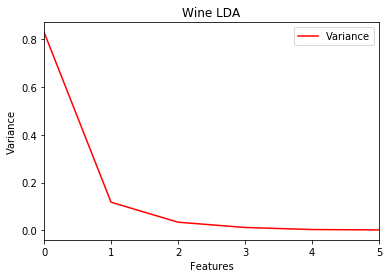

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='eigen', n_components=11)
lda.fit_transform(X, y)
lda_res = pd.Series(lda.explained_variance_ratio_)
loss = 0.05

print (lda_res)
variance = 0
for x in lda_res:
        if x >= loss:
            variance += x
print (variance)

lda_res.plot(c = 'r',label = 'Variance')
#ax = lda_var.plot(kind = 'bar',ylim = (0.,0.5),label = "Variance-Ratio")
plt.legend()

plt.title("Wine LDA")
plt.xlabel("Features")
plt.ylabel("Variance")

# SVD

0    9.079336e-01
1    7.956941e-02
2    1.009895e-02
3    2.295584e-03
4    8.513437e-05
5    6.779703e-06
6    5.526906e-06
7    4.306592e-06
8    4.938483e-07
dtype: float64
0.9976019675123182
Reduced  8  out of  10
Reduced Dimension: 8 out of 10


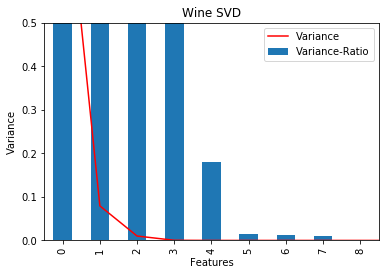

In [25]:
svd = TruncatedSVD(n_components = X.shape[1]-1)
temp = svd.fit_transform(X)
svd_res = pd.Series(svd.explained_variance_ratio_)
svd_var = pd.Series(svd.explained_variance_)

loss = 0.01

print (svd_res)
variance = 0
reduced = 0
for x in svd_res:
        if x >= loss:
            variance += x
            reduced +=1
print (variance)
print ("Reduced ", 1 +X.shape[1] - reduced, " out of ", X.shape[1])

pca_res.plot(c = 'r',label = 'Variance')
ax = svd_var.plot(kind = 'bar',ylim = (0.,0.5),label = "Variance-Ratio")
plt.legend()

plt.title("Wine SVD")
plt.xlabel("Features")
plt.ylabel("Variance")


In [31]:
svd = TruncatedSVD(n_components = X.shape[1]-1)
temp = svd.fit_transform(X)
diff = X - svd.inverse_transform(temp)
print(3)
print("MEAN", np.mean(diff))
print("STD", np.std(diff))
print("MAX", np.max(diff))
print("MIN", np.min(diff))

3
MEAN -6.904302624077823e-06
STD 0.0066225336084945055
MAX 0.28797797464462016
MIN -0.04691380872457407
